In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)

df = pd.read_csv("benchmark.csv")
df['overhead'] = df['bandwidth'] - df['delta']
df['overhead_ratio'] = df['overhead'] / df['delta']
df["bandwidth_bin"] = pd.cut(df["bandwidth"], bins=5)

df.head()
_df = df

palette = {
    "RIBLT": "#E69F00",
    "TRADI": "#56B4E9"
}

order = ["RIBLT", "TRADI"]

In [14]:
df = df[(df["coded_symbols_per_round_trip"] == 1)]

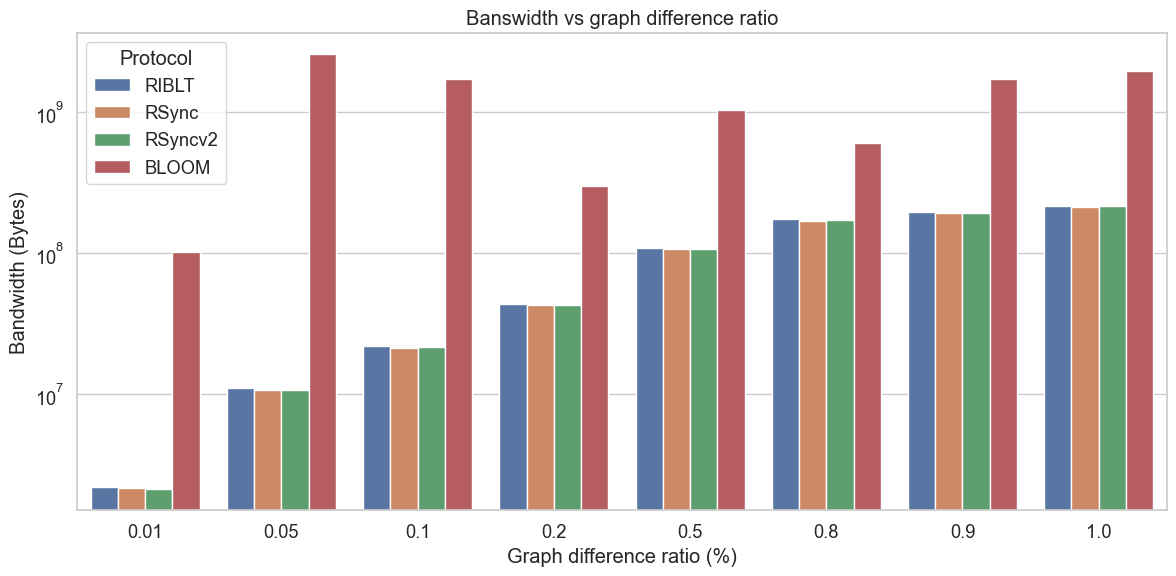

In [15]:
plt.figure(figsize=(12, 6))



ax = sns.barplot(data=df, x="diff", y="bandwidth", hue="method", errorbar=None)

plt.ylabel("Bandwidth (Bytes)")
plt.xlabel("Graph difference ratio (%)")
legend = plt.legend()
legend.set_title("Protocol")
plt.title("Banswidth vs graph difference ratio")
ax.set_yscale("log")
plt.tight_layout()
plt.savefig("bandwidth.pdf")
plt.show()

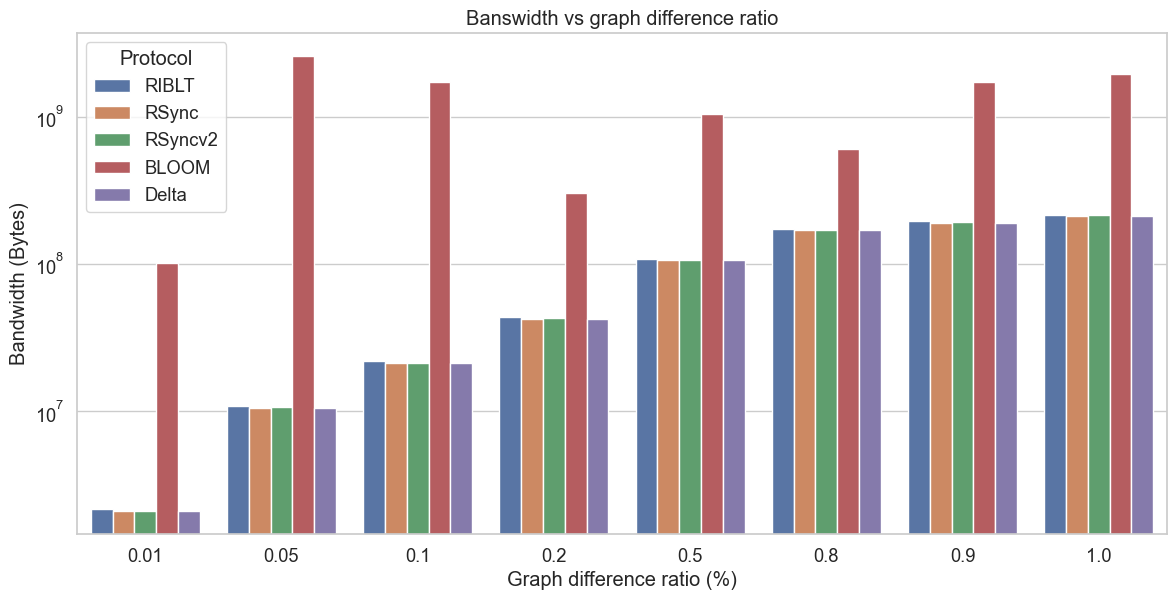

In [17]:

df_delta = df.groupby("diff")["delta"].first().reset_index()
df_delta["category"] = "Delta"
df_delta["value"] = df_delta["delta"]

df_bw = df[["diff", "method", "bandwidth"]].copy()
df_bw["category"] = df_bw["method"]
df_bw["value"] = df_bw["bandwidth"]

df_plot = pd.concat([
    df_bw[["diff", "category", "value"]],
    df_delta[["diff", "category", "value"]]
])

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=df_plot,
    x="diff",
    y="value",
    hue="category",
    errorbar=None
)

plt.title("")
plt.ylabel("Bandwidth (Bytes)")
plt.xlabel("Graph difference ratio (%)")
legend = plt.legend()
legend.set_title("Protocol")
ax.set_yscale("log")
plt.tight_layout()
plt.title("Banswidth vs graph difference ratio")
plt.savefig("bandwidth_all.pdf")
plt.show()

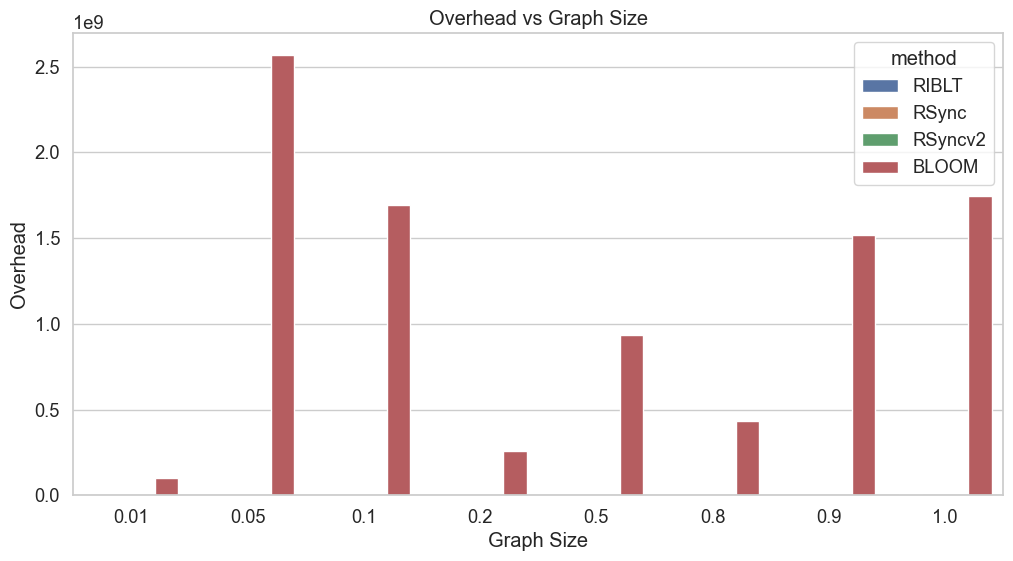

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='diff', y='overhead', hue='method', errorbar=None)
ax.set_yscale("log")
plt.title("Overhead vs Graph Size")
plt.xlabel("Graph Size")
plt.ylabel("Overhead")
plt.show()

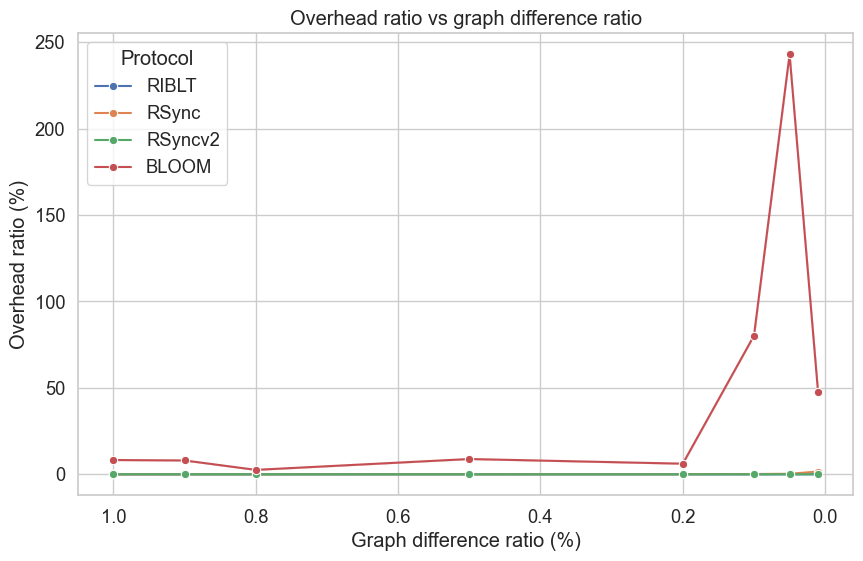

In [25]:
plt.figure(figsize=(10, 6))

a = sns.lineplot(
    data=_df,
    x="diff",
    y="overhead_ratio",
    hue="method",
    marker="o",
    errorbar=('ci', False)
)

plt.ylabel("Overhead ratio (%)")
plt.xlabel("Graph difference ratio (%)")
legend = plt.legend()
legend.set_title("Protocol")

plt.title("Overhead ratio vs graph difference ratio")
a.invert_xaxis()
plt.savefig("overhead_ratio.pdf")

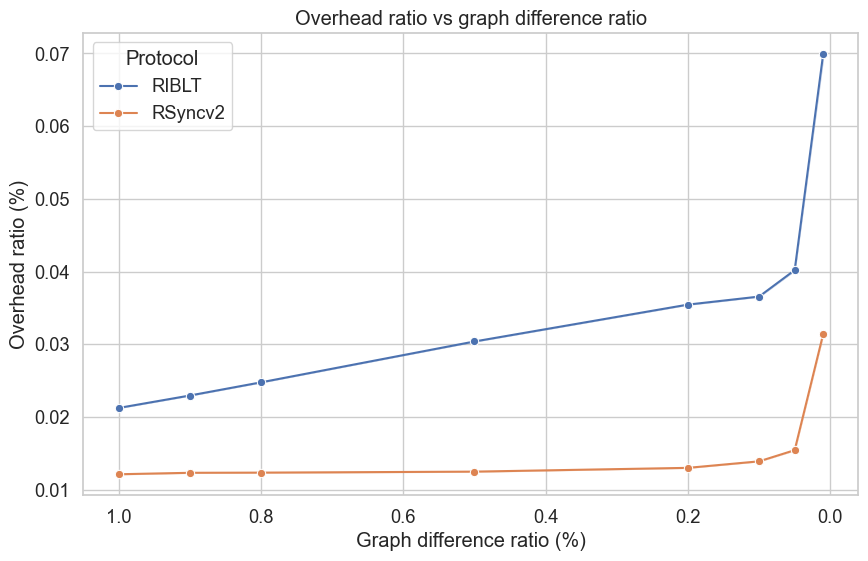

In [30]:
plt.figure(figsize=(10, 6))

d = _df[(_df["method"] != "BLOOM") & (_df["method"] != "RSync")]

a = sns.lineplot(
    data=d,
    x="diff",
    y="overhead_ratio",
    hue="method",
    marker="o",
    errorbar=('ci', False)
)

plt.ylabel("Overhead ratio (%)")
plt.xlabel("Graph difference ratio (%)")
legend = plt.legend()
legend.set_title("Protocol")

plt.title("Overhead ratio vs graph difference ratio")
a.invert_xaxis()
plt.savefig("overhead_ratio.pdf")

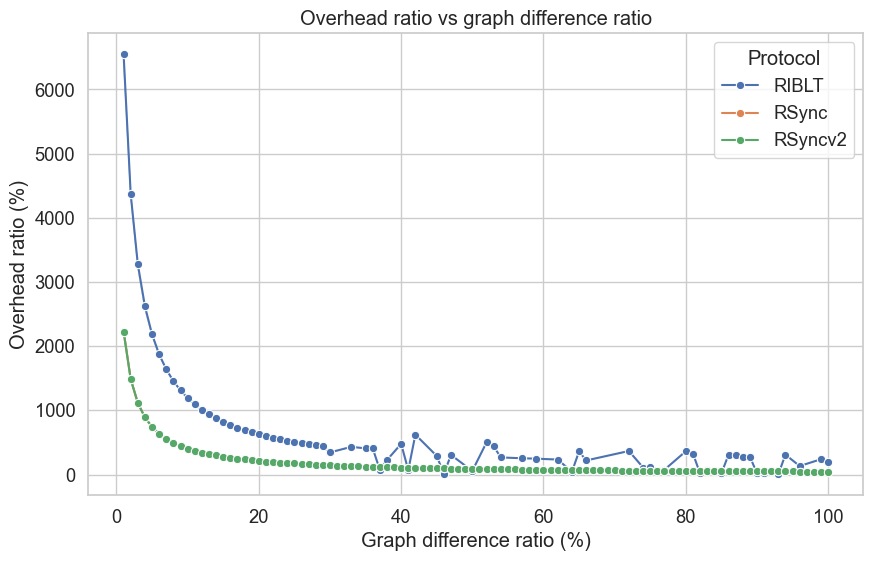

In [33]:
plt.figure(figsize=(10, 6))

d = _df[(_df["coded_symbols_per_round_trip"] <= 100) & (_df["method"] != "BLOOM")]

a = sns.lineplot(
    data=d,
    x="coded_symbols_per_round_trip",
    y="round_trips",
    hue="method",
    marker="o",
    errorbar=('ci', False)
)

plt.ylabel("Overhead ratio (%)")
plt.xlabel("Graph difference ratio (%)")
legend = plt.legend()
legend.set_title("Protocol")

plt.title("Overhead ratio vs graph difference ratio")
plt.savefig("overhead_ratio.pdf")

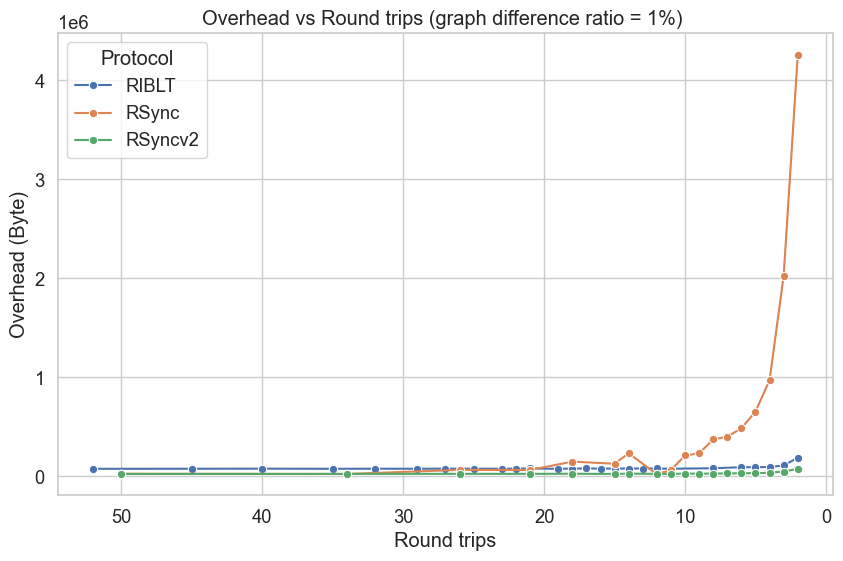

In [34]:
d = _df[(_df["diff"] == 0.01) & (_df["round_trips"] <= 55) & (_df["method"] != "BLOOM")]
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=d,
    x="round_trips",
    y="overhead",
    hue="method",
    marker="o",
    errorbar=('ci', False)
)


plt.title("Overhead vs Round trips (graph difference ratio = 1%) ")
plt.ylabel("Overhead (Byte)")
plt.xlabel("Round trips")
legend = plt.legend()
legend.set_title("Protocol")
ax.invert_xaxis()
plt.savefig("round_trips_1.pdf")

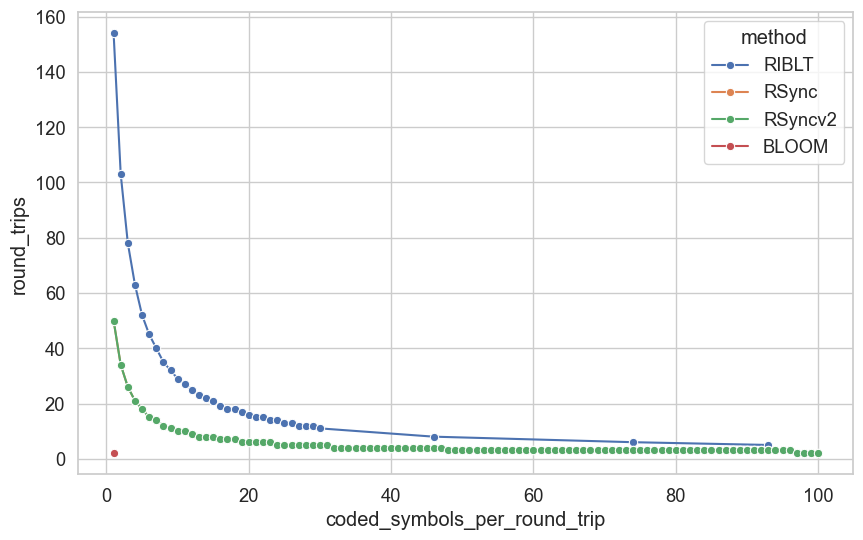

In [35]:
d = _df[(_df["diff"] == 0.01) & (_df["coded_symbols_per_round_trip"] <= 100)]
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=d,
    x="coded_symbols_per_round_trip",
    y="round_trips",
    hue="method",
    marker="o",
    errorbar=('ci', False)
)


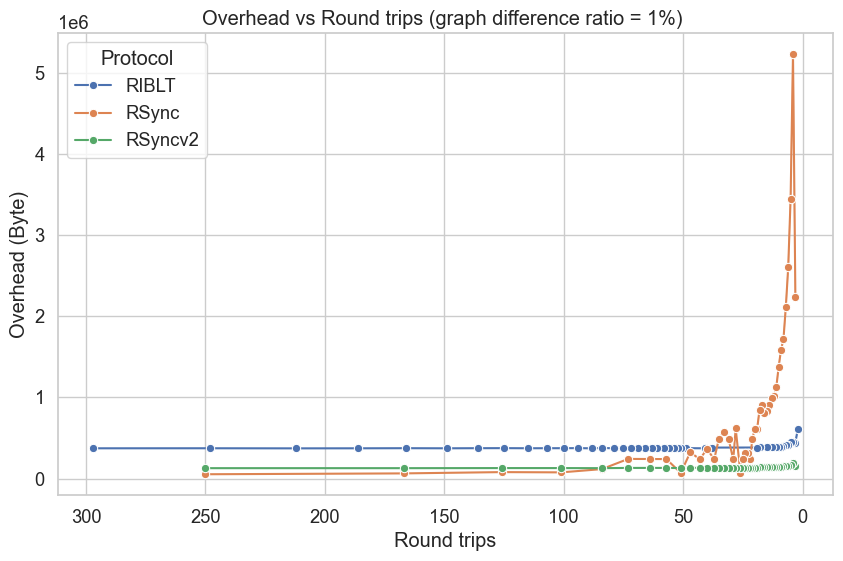

In [37]:
d = _df[(_df["diff"] == 0.05) & (_df["round_trips"] <= 300) & (_df["method"] != "BLOOM")]
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=d,
    x="round_trips",
    y="overhead",
    hue="method",
    marker="o",
    errorbar=('ci', False)
)

plt.title("Overhead vs Round trips (graph difference ratio = 1%) ")
plt.ylabel("Overhead (Byte)")
plt.xlabel("Round trips")
legend = plt.legend()
legend.set_title("Protocol")
ax.invert_xaxis()
plt.savefig("round_trips_5.pdf")

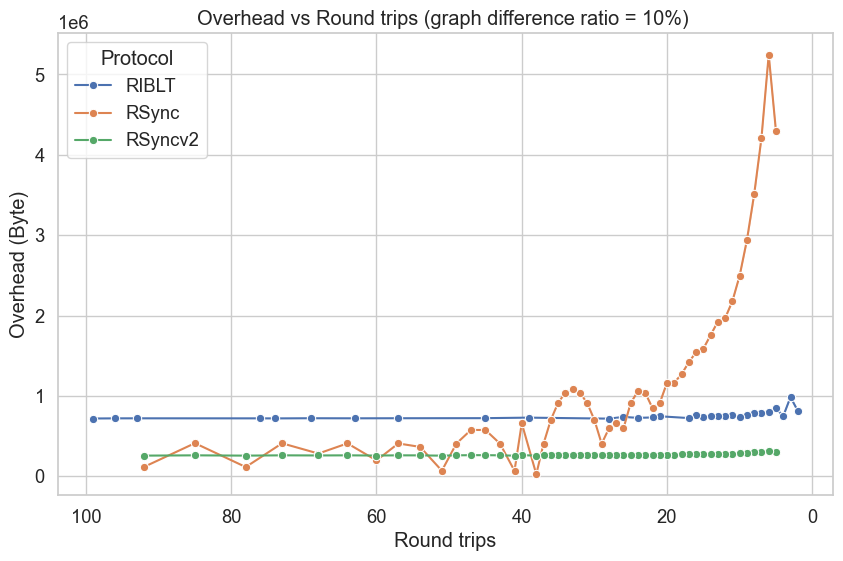

In [40]:
d = _df[(_df["diff"] == 0.1) & (_df["round_trips"] <= 100) & (_df["method"] != "BLOOM")]
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=d,
    x="round_trips",
    y="overhead",
    hue="method",
    marker="o",
    errorbar=('ci', False)
)

plt.title("Overhead vs Round trips (graph difference ratio = 10%) ")
plt.ylabel("Overhead (Byte)")
plt.xlabel("Round trips")
legend = plt.legend()
legend.set_title("Protocol")
ax.invert_xaxis()
plt.savefig("round_trips_10.pdf")

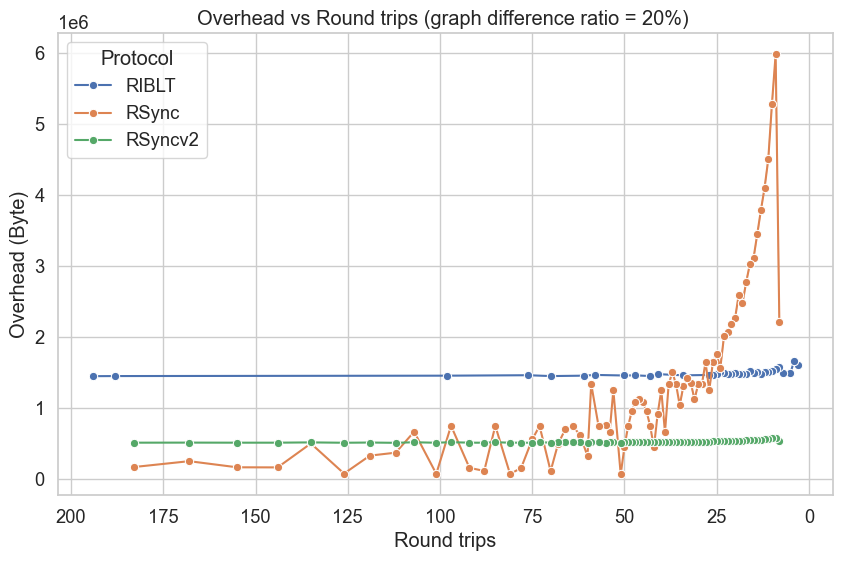

In [44]:
d = _df[(_df["diff"] == 0.2) & (_df["round_trips"] <= 200) & (_df["method"] != "BLOOM")]
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=d,
    x="round_trips",
    y="overhead",
    hue="method",
    marker="o",
    errorbar=('ci', False)
)

plt.title("Overhead vs Round trips (graph difference ratio = 20%) ")
plt.ylabel("Overhead (Byte)")
plt.xlabel("Round trips")
legend = plt.legend()
legend.set_title("Protocol")
ax.invert_xaxis()
plt.savefig("round_trips_20.pdf")

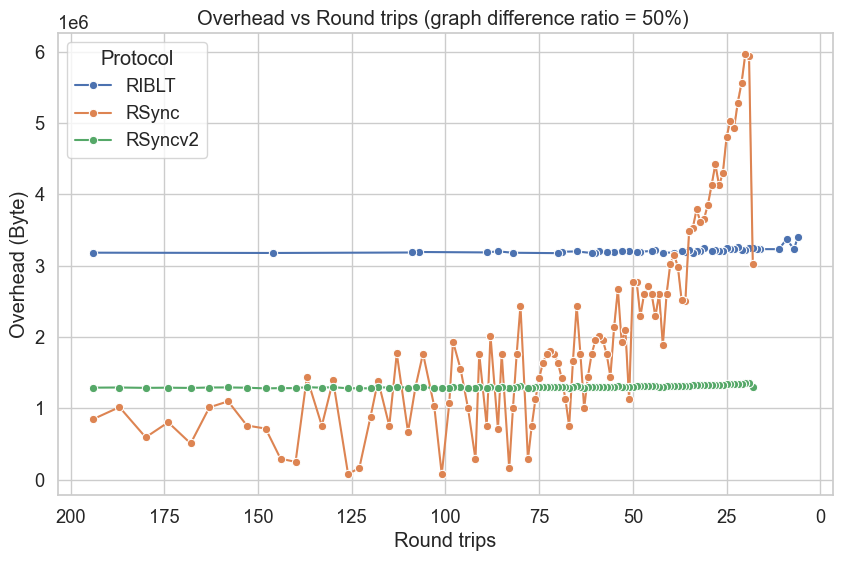

In [46]:
d = _df[(_df["diff"] == 0.5) & (_df["round_trips"] <= 200) & (_df["method"] != "BLOOM")]
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=d,
    x="round_trips",
    y="overhead",
    hue="method",
    marker="o",
    errorbar=('ci', False)
)

plt.title("Overhead vs Round trips (graph difference ratio = 50%) ")
plt.ylabel("Overhead (Byte)")
plt.xlabel("Round trips")
legend = plt.legend()
legend.set_title("Protocol")
ax.invert_xaxis()
plt.savefig("round_trips_50.pdf")

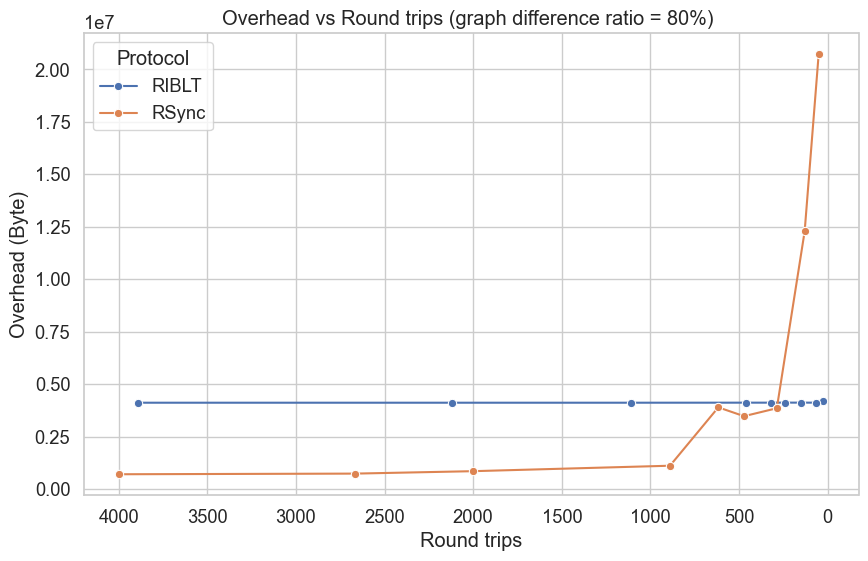

In [110]:
d = _df[(_df["diff"] == 0.8) & (_df["round_trips"] <= 7000)]
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=d,
    x="round_trips",
    y="overhead",
    hue="method",
    marker="o",
    errorbar=('ci', False)
)

plt.title("Overhead vs Round trips (graph difference ratio = 80%) ")
plt.ylabel("Overhead (Byte)")
plt.xlabel("Round trips")
legend = plt.legend()
legend.set_title("Protocol")
ax.invert_xaxis()
plt.savefig("round_trips_80.pdf")

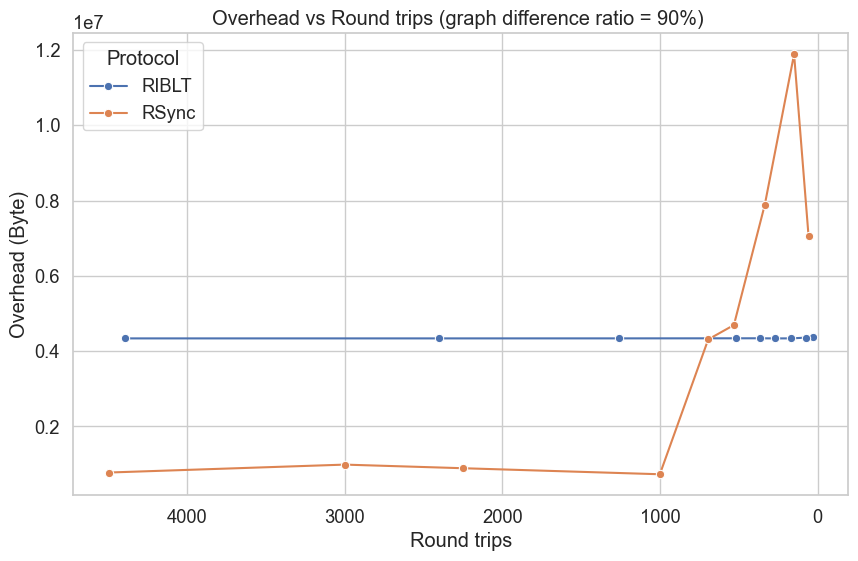

In [111]:
d = _df[(_df["diff"] == 0.9) & (_df["round_trips"] <= 7000)]
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=d,
    x="round_trips",
    y="overhead",
    hue="method",
    marker="o",
    errorbar=('ci', False)
)

plt.title("Overhead vs Round trips (graph difference ratio = 90%) ")
plt.ylabel("Overhead (Byte)")
plt.xlabel("Round trips")
legend = plt.legend()
legend.set_title("Protocol")
ax.invert_xaxis()
plt.savefig("round_trips_90.pdf")

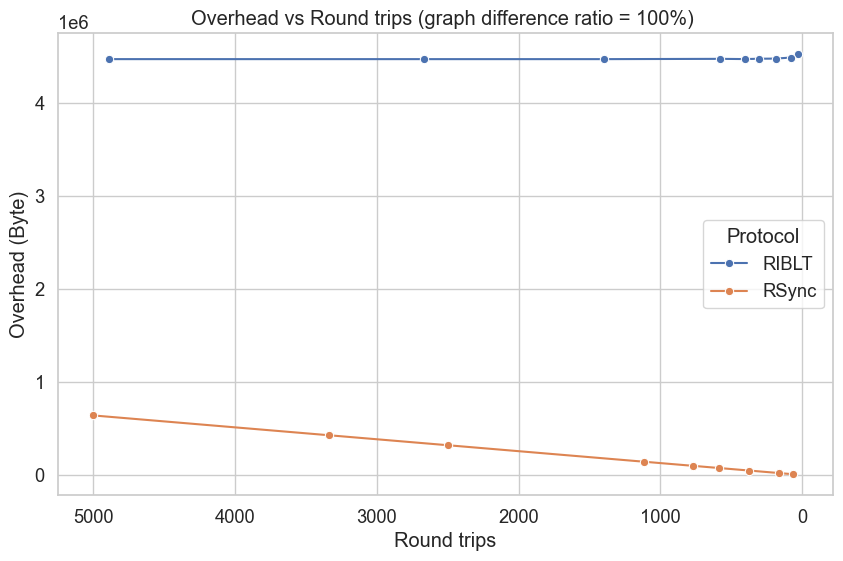

In [117]:
d = _df[(_df["diff"] == 1) & (_df["round_trips"] <= 7000)]
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=d,
    x="round_trips",
    y="overhead",
    hue="method",
    marker="o",
    errorbar=('ci', False)
)

plt.title("Overhead vs Round trips (graph difference ratio = 100%) ")
plt.ylabel("Overhead (Byte)")
plt.xlabel("Round trips")
legend = plt.legend()
legend.set_title("Protocol")
ax.invert_xaxis()
plt.savefig("round_trips_100.pdf")

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14, 6))



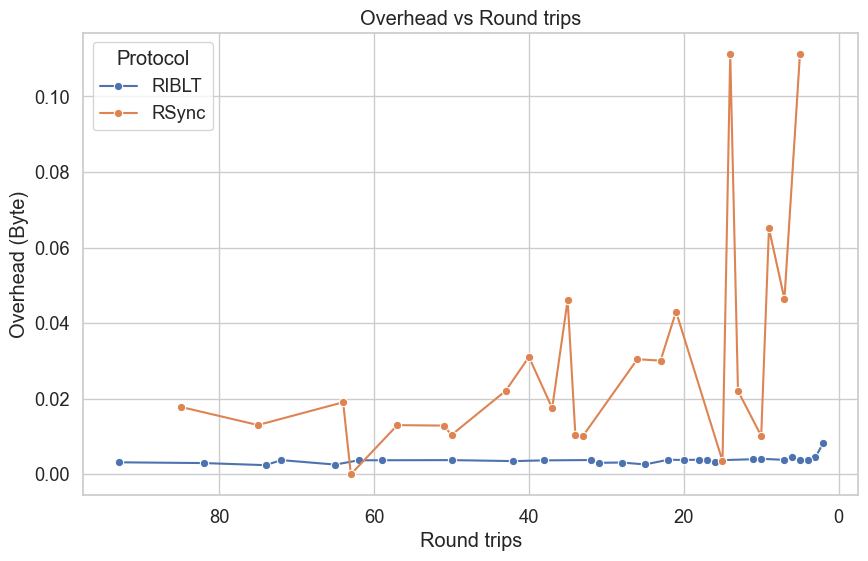

In [116]:
plt.figure(figsize=(10, 6))

d =  _df[(_df["round_trips"] <= 100) ]

ax = sns.lineplot(
    data=d,
    x="round_trips",
    y="overhead_ratio",
    hue="method",
    marker="o",
   
    errorbar=('ci', False)
)

plt.title("Overhead vs Round trips")
plt.ylabel("Overhead (Byte)")
plt.xlabel("Round trips")
legend = plt.legend()
legend.set_title("Protocol")
ax.invert_xaxis()
plt.savefig("round_trips_all.pdf")

<Axes: xlabel='round_trips', ylabel='overhead_ratio'>

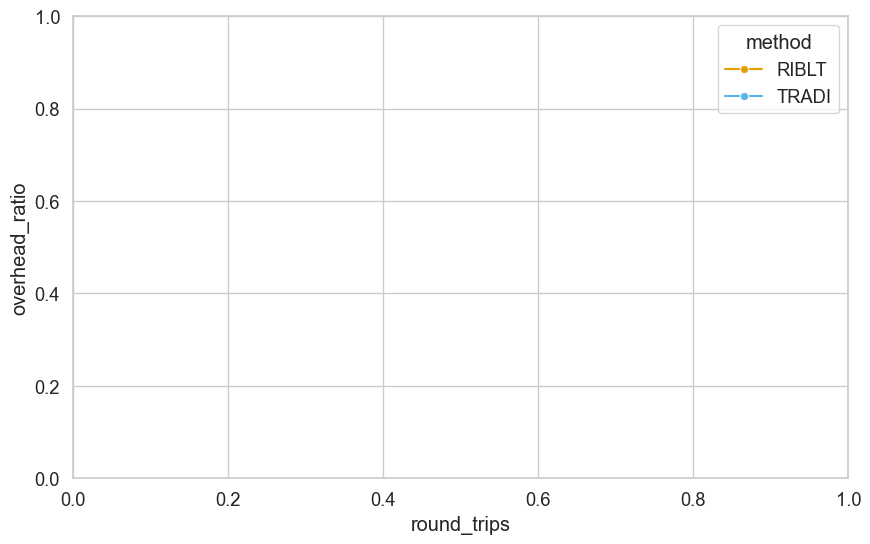

In [114]:
plt.figure(figsize=(10, 6))

d =  df[(df["round_trips"] <= 100) & (df["overhead_ratio"] < 1)]

sns.lineplot(
    data=d,
    x="round_trips",
    y="overhead_ratio",
    hue="method",
    marker="o",
    palette=palette,
    hue_order=order,
    errorbar=('ci', False)
)

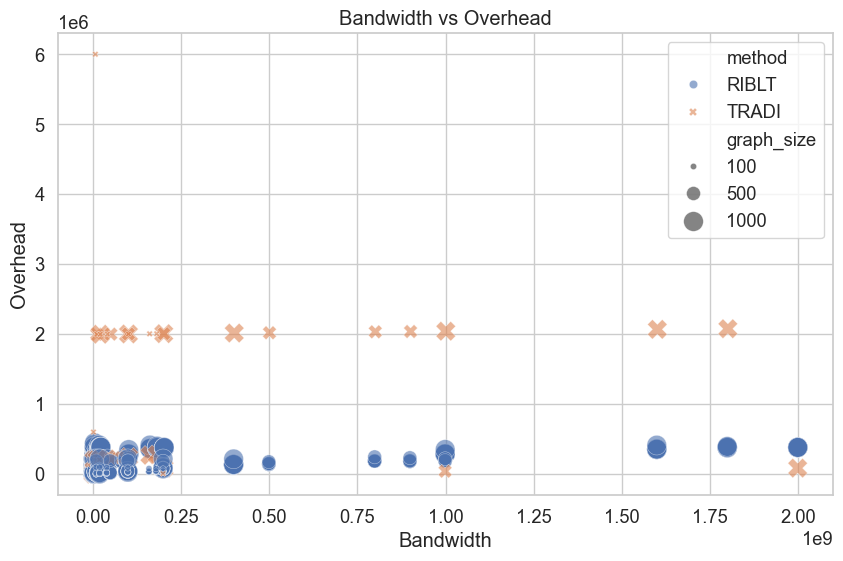

In [128]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bandwidth', y='overhead', hue='method', style='method', size='graph_size', sizes=(20, 200), palette='deep', alpha=0.6)
plt.title("Bandwidth vs Overhead")
plt.xlabel("Bandwidth")
plt.ylabel("Overhead")
plt.show()

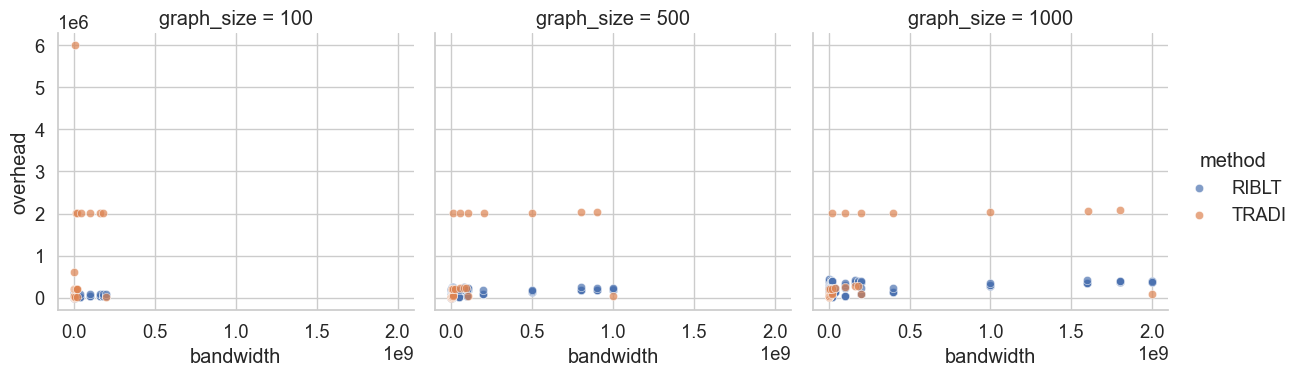

In [19]:
g = sns.FacetGrid(df, col="graph_size", hue="method", col_wrap=3, height=4)
g.map_dataframe(sns.scatterplot, x="bandwidth", y="overhead", alpha=0.7)
g.add_legend()

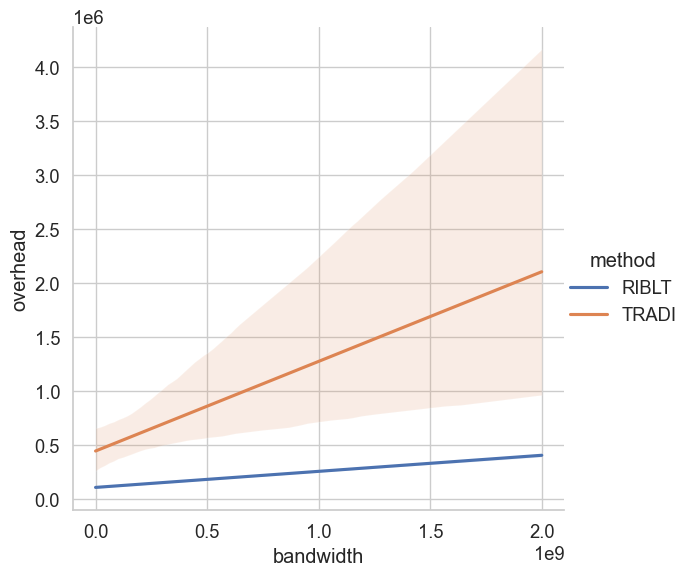

In [20]:
sns.lmplot(
    data=df, x='bandwidth', y='overhead',
    hue='method', scatter=False, height=6, aspect=1.
)

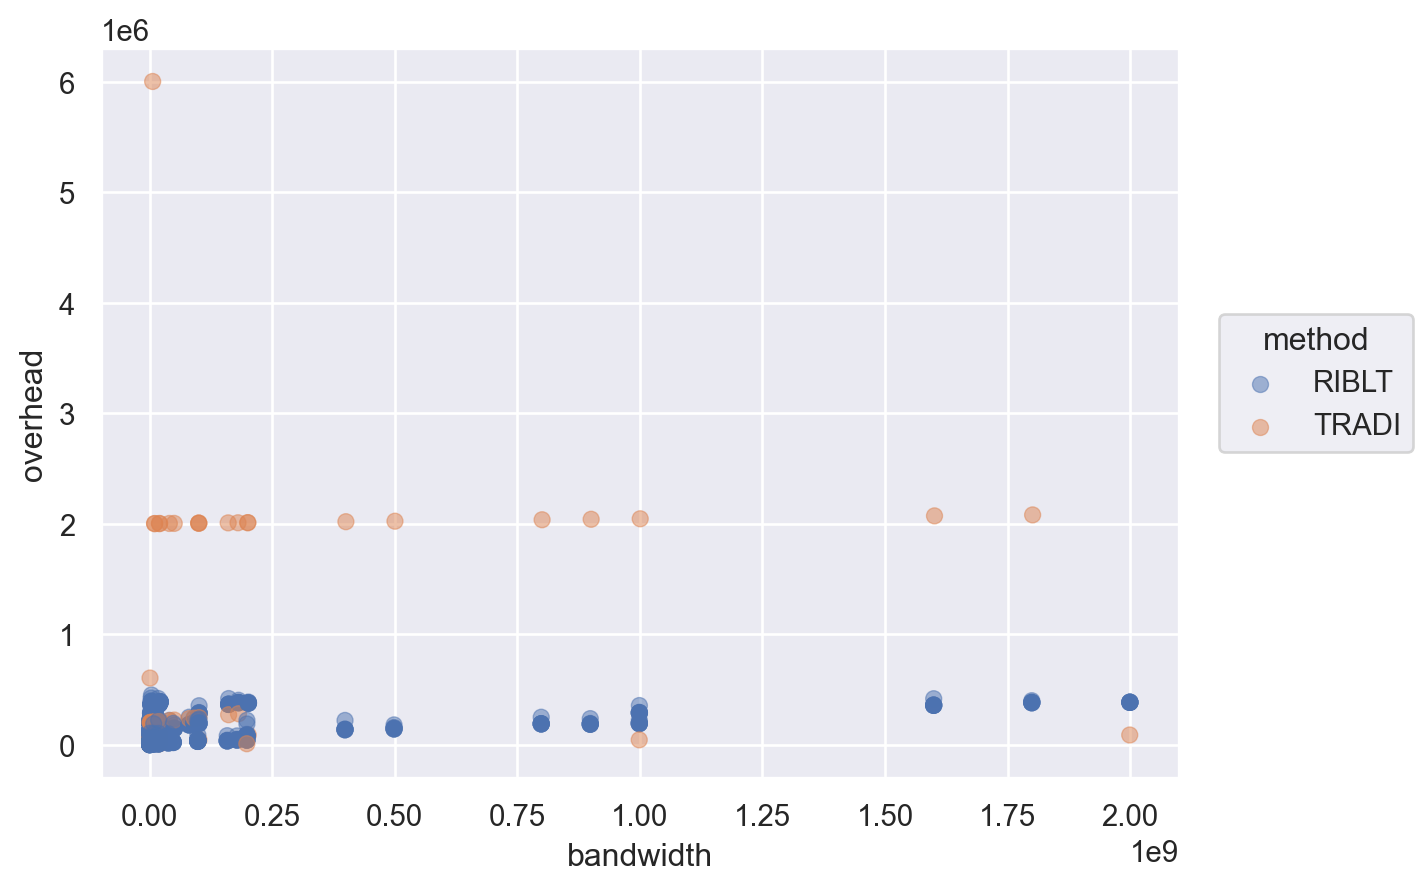

In [21]:
import seaborn.objects as so

(
    so.Plot(df, x="bandwidth", y="overhead", color="method")
    .add(so.Dot(alpha=0.5))
    .facet(row=None, col=None)  # keeps single panel
)

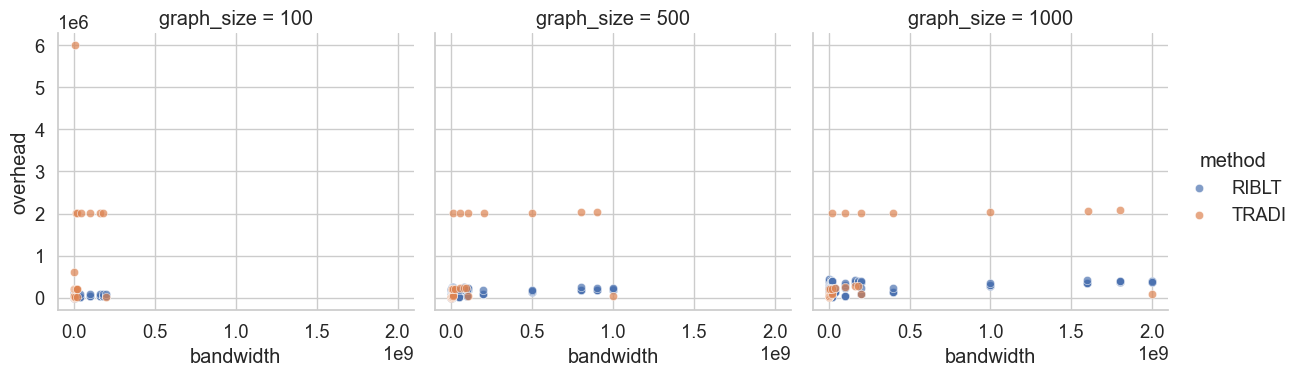

In [22]:
g = sns.FacetGrid(df, col="graph_size", hue="method", col_wrap=3, height=4)
g.map_dataframe(sns.scatterplot, x="bandwidth", y="overhead", alpha=0.7)
g.add_legend()

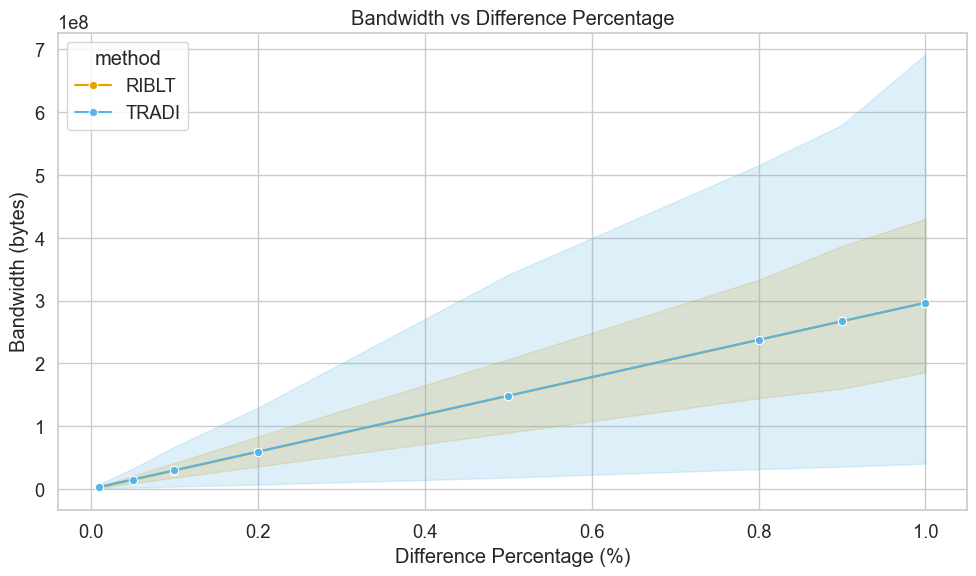

In [23]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df,
    x="diff",
    y="bandwidth",
    hue="method",
    marker="o",
    palette=palette,
    hue_order=order
)

plt.title("Bandwidth vs Difference Percentage")
plt.xlabel("Difference Percentage (%)")
plt.ylabel("Bandwidth (bytes)")
plt.grid(True)
plt.tight_layout()
plt.show()

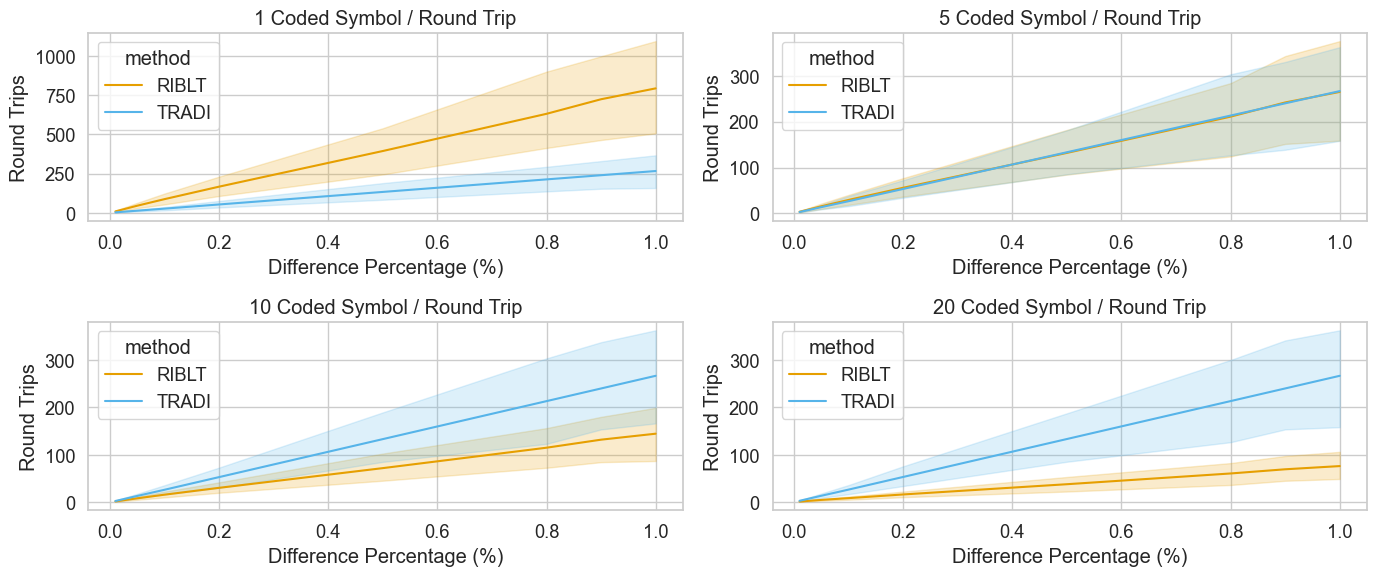

In [24]:
df_1 = df[
    (df["method"] == "TRADI") |
    ((df["method"] == "RIBLT") & (df["coded_symbols_per_round_trip"] == 1))
]

df_5 = df[
    (df["method"] == "TRADI") |
    ((df["method"] == "RIBLT") & (df["coded_symbols_per_round_trip"] == 5))
]

df_10 = df[
    (df["method"] == "TRADI") |
    ((df["method"] == "RIBLT") & (df["coded_symbols_per_round_trip"] == 10))
]

df_20 = df[
    (df["method"] == "TRADI") |
    ((df["method"] == "RIBLT") & (df["coded_symbols_per_round_trip"] == 20))
]

fig, ax = plt.subplots(2, 2, figsize=(14, 6))

sns.lineplot(data=df_1, x="diff", y="round_trips", hue="method", ax=ax[0, 0], palette=palette, hue_order=order)
sns.lineplot(data=df_5, x="diff", y="round_trips", hue="method", ax=ax[0, 1], palette=palette, hue_order=order)
sns.lineplot(data=df_10, x="diff", y="round_trips", hue="method", ax=ax[1, 0], palette=palette, hue_order=order)
sns.lineplot(data=df_20, x="diff", y="round_trips", hue="method", ax=ax[1, 1], palette=palette, hue_order=order)

ax[0, 0].set_title("1 Coded Symbol / Round Trip")
ax[0, 1].set_title("5 Coded Symbol / Round Trip")
ax[1, 0].set_title("10 Coded Symbol / Round Trip")
ax[1, 1].set_title("20 Coded Symbol / Round Trip")

ax[0, 0].set_xlabel("Difference Percentage (%)")
ax[0, 1].set_xlabel("Difference Percentage (%)")
ax[1, 0].set_xlabel("Difference Percentage (%)")
ax[1, 1].set_xlabel("Difference Percentage (%)")

ax[0, 0].set_ylabel("Round Trips")
ax[0, 1].set_ylabel("Round Trips")
ax[1, 0].set_ylabel("Round Trips")
ax[1, 1].set_ylabel("Round Trips")


plt.tight_layout()
plt.show()

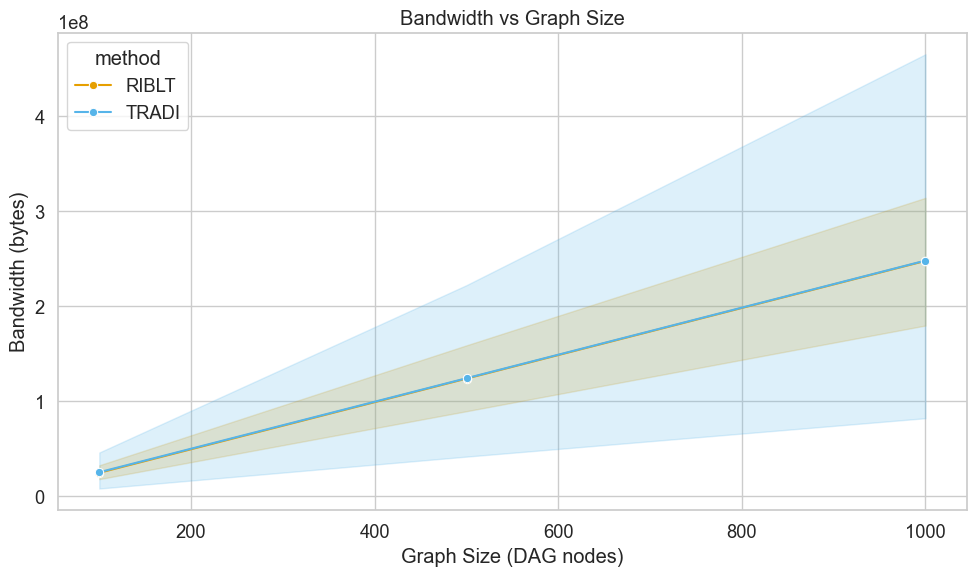

In [64]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df,
    x="graph_size",
    y="bandwidth",
    hue="method",
    marker="o",
    palette=palette,
    hue_order=order
)

plt.title("Bandwidth vs Graph Size")
plt.xlabel("Graph Size (DAG nodes)")
plt.ylabel("Bandwidth (bytes)")
plt.grid(True)
plt.tight_layout()
plt.show()

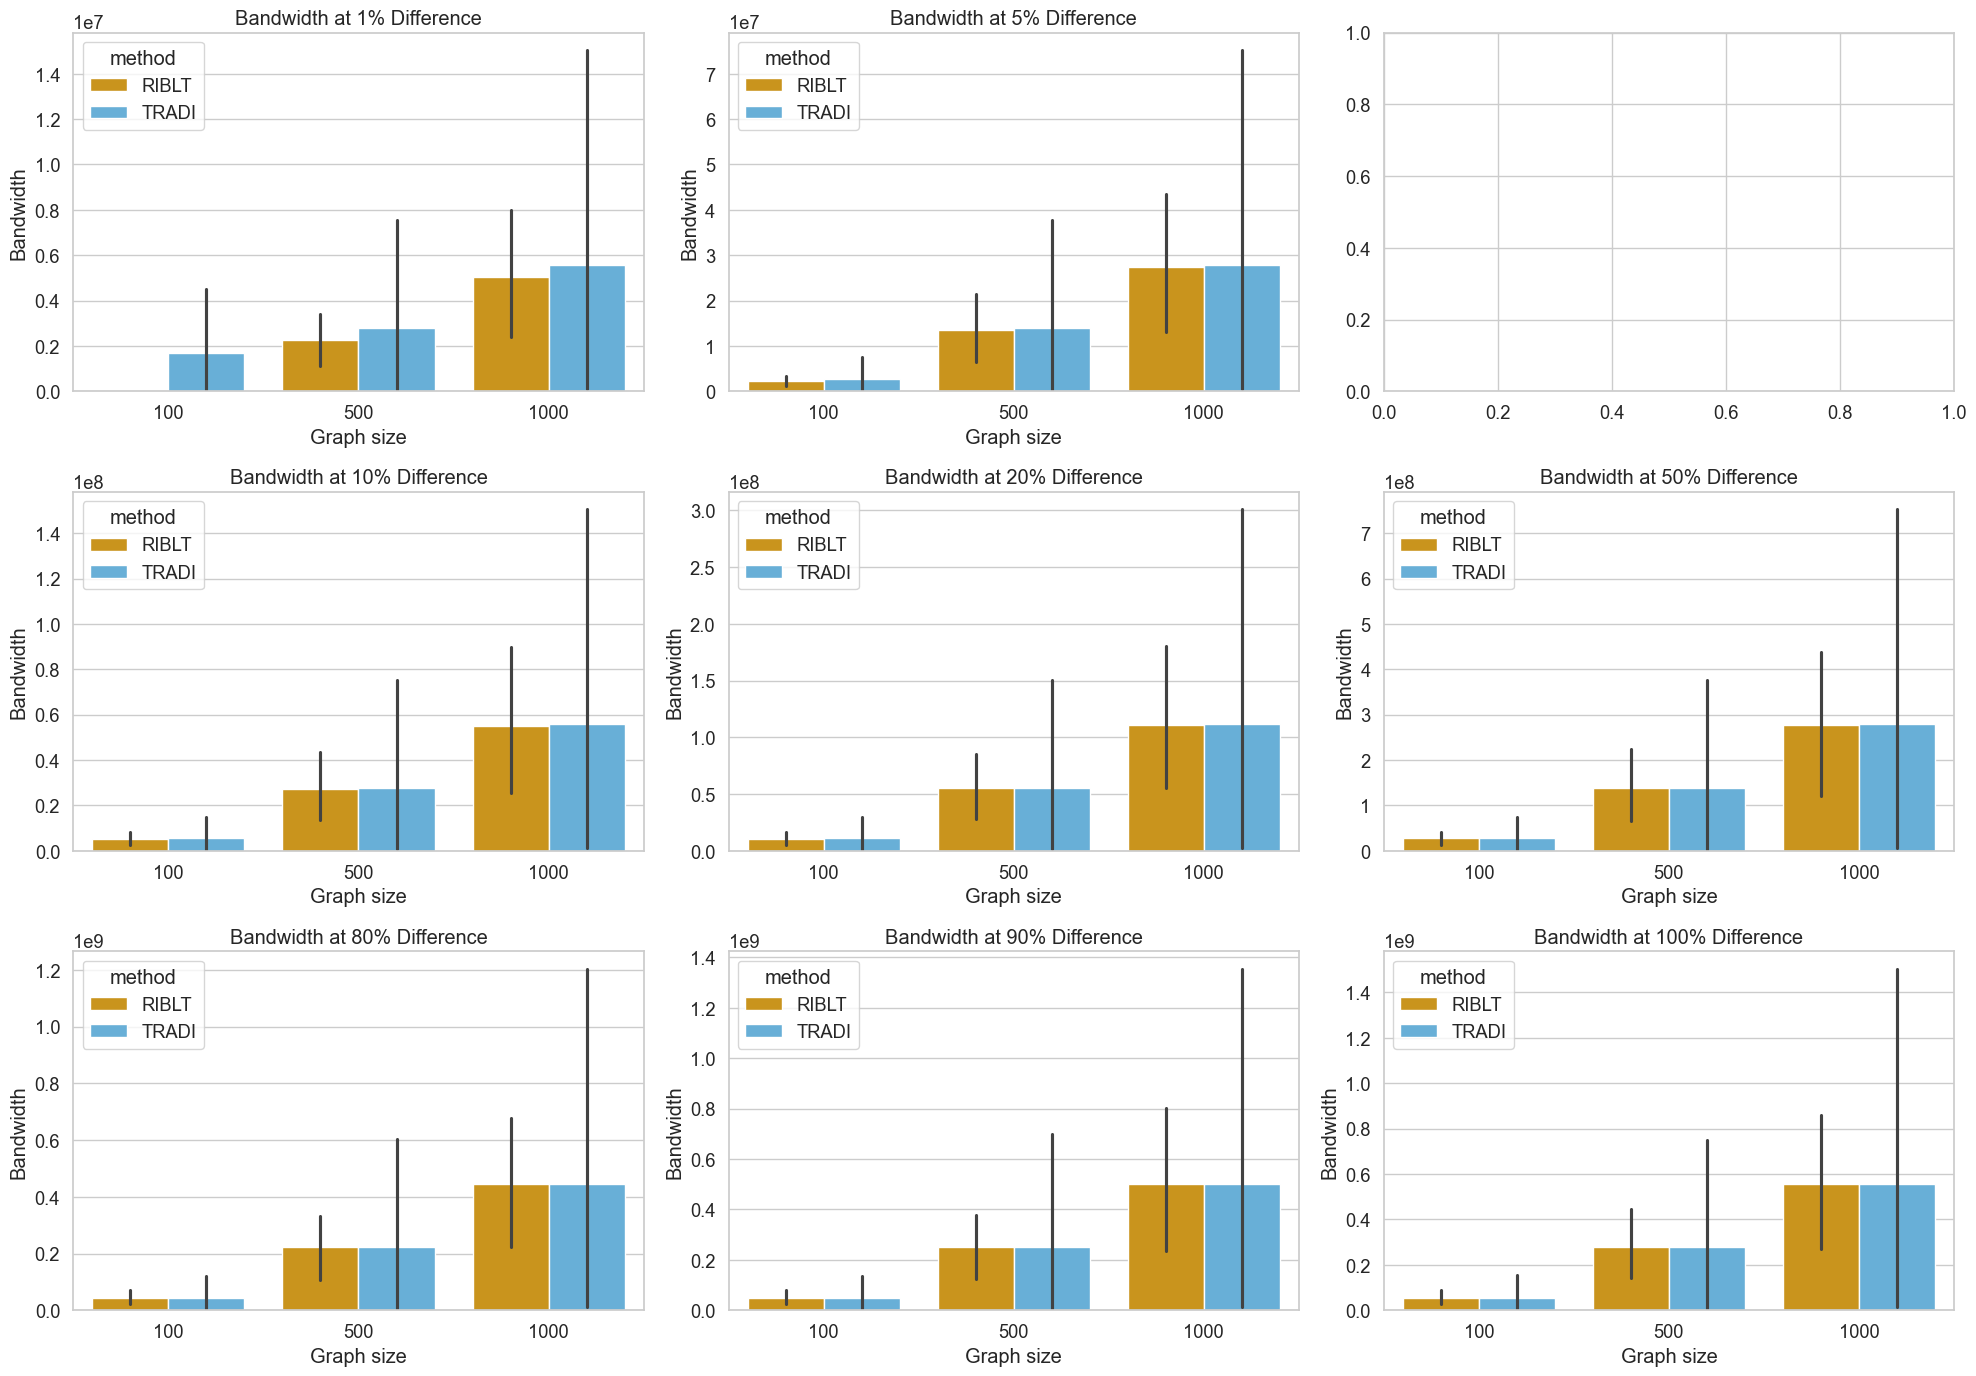

In [65]:
fig, ax = plt.subplots(3, 3, figsize=(20, 14))

df_01 = df[df['diff'] == 0.01]
df_05 = df[df['diff'] == 0.05]
df_10 = df[df['diff'] == 0.1]
df_20 = df[df['diff'] == 0.2]
df_50 = df[df['diff'] == 0.5]
df_80 = df[df['diff'] == 0.8]
df_90 = df[df['diff'] == 0.9]
df_100 = df[df['diff'] == 1.0]

sns.barplot(data=df_01, x="graph_size", y="bandwidth", hue="method", ax=ax[0, 0], palette=palette, hue_order=order)
sns.barplot(data=df_05, x="graph_size", y="bandwidth", hue="method", ax=ax[0, 1], palette=palette, hue_order=order)
sns.barplot(data=df_10, x="graph_size", y="bandwidth", hue="method", ax=ax[1, 0], palette=palette, hue_order=order)
sns.barplot(data=df_20, x="graph_size", y="bandwidth", hue="method", ax=ax[1, 1], palette=palette, hue_order=order)
sns.barplot(data=df_50, x="graph_size", y="bandwidth", hue="method", ax=ax[1, 2], palette=palette, hue_order=order)
sns.barplot(data=df_80, x="graph_size", y="bandwidth", hue="method", ax=ax[2, 0], palette=palette, hue_order=order)
sns.barplot(data=df_90, x="graph_size", y="bandwidth", hue="method", ax=ax[2, 1], palette=palette, hue_order=order)
sns.barplot(data=df_100, x="graph_size", y="bandwidth", hue="method", ax=ax[2, 2], palette=palette, hue_order=order)

ax[0, 0].set_title("Bandwidth at 1% Difference")
ax[0, 1].set_title("Bandwidth at 5% Difference")
ax[1, 0].set_title("Bandwidth at 10% Difference")
ax[1, 1].set_title("Bandwidth at 20% Difference")
ax[1, 2].set_title("Bandwidth at 50% Difference")
ax[2, 0].set_title("Bandwidth at 80% Difference")
ax[2, 1].set_title("Bandwidth at 90% Difference")
ax[2, 2].set_title("Bandwidth at 100% Difference")

ax[0, 0].set_xlabel("Graph size")
ax[0, 1].set_xlabel("Graph size")
ax[1, 0].set_xlabel("Graph size")
ax[1, 1].set_xlabel("Graph size")
ax[1, 2].set_xlabel("Graph size")
ax[2, 0].set_xlabel("Graph size")
ax[2, 1].set_xlabel("Graph size")
ax[2, 2].set_xlabel("Graph size")

ax[0, 0].set_ylabel("Bandwidth")
ax[0, 1].set_ylabel("Bandwidth")
ax[1, 0].set_ylabel("Bandwidth")
ax[1, 1].set_ylabel("Bandwidth")
ax[1, 2].set_ylabel("Bandwidth")
ax[2, 0].set_ylabel("Bandwidth")
ax[2, 1].set_ylabel("Bandwidth")
ax[2, 2].set_ylabel("Bandwidth")

plt.tight_layout()
plt.show()

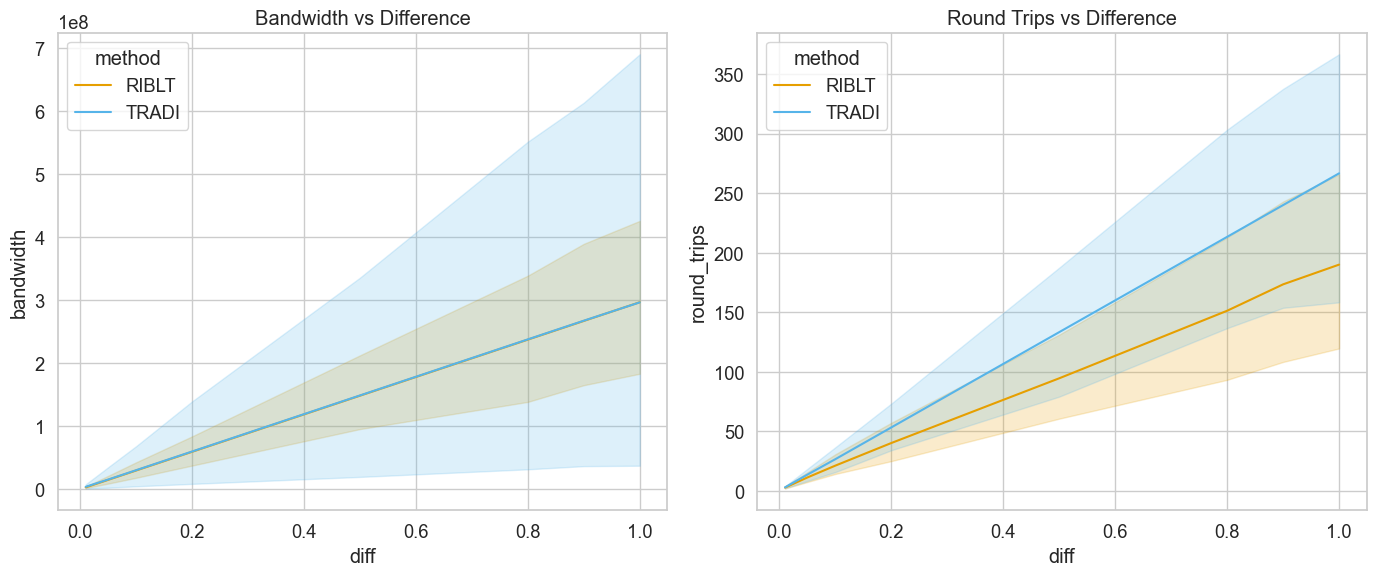

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.lineplot(data=df, x="diff", y="bandwidth", hue="method", ax=ax[0], palette=palette, hue_order=order)
sns.lineplot(data=df, x="diff", y="round_trips", hue="method", ax=ax[1], palette=palette, hue_order=order)

ax[0].set_title("Bandwidth vs Difference")
ax[1].set_title("Round Trips vs Difference")

plt.tight_layout()
plt.show()

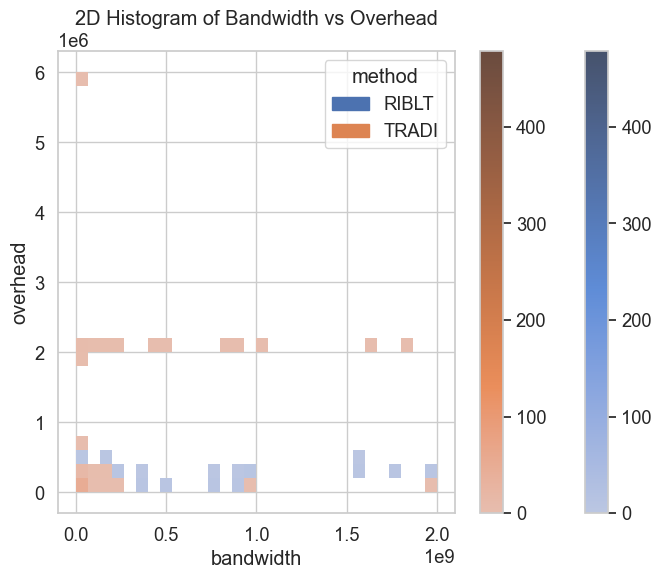

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(
    data=df,
    x="bandwidth",
    y="overhead",
    bins=30,
    cmap="viridis",
    cbar=True,
    hue="method"
)
plt.title("2D Histogram of Bandwidth vs Overhead")
plt.show()

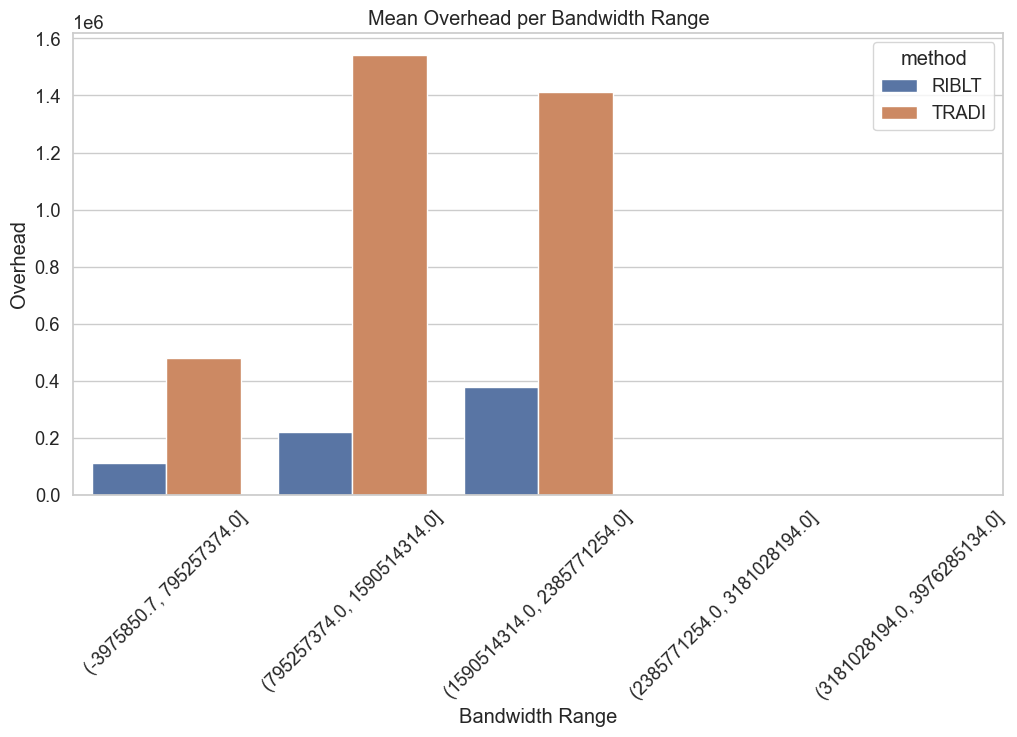

In [71]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x="bandwidth_bin",
    y="overhead",
    hue="method",
    errorbar=None
)

plt.xticks(rotation=45)
plt.title("Mean Overhead per Bandwidth Range")
plt.xlabel("Bandwidth Range")
plt.ylabel("Overhead")
plt.show()

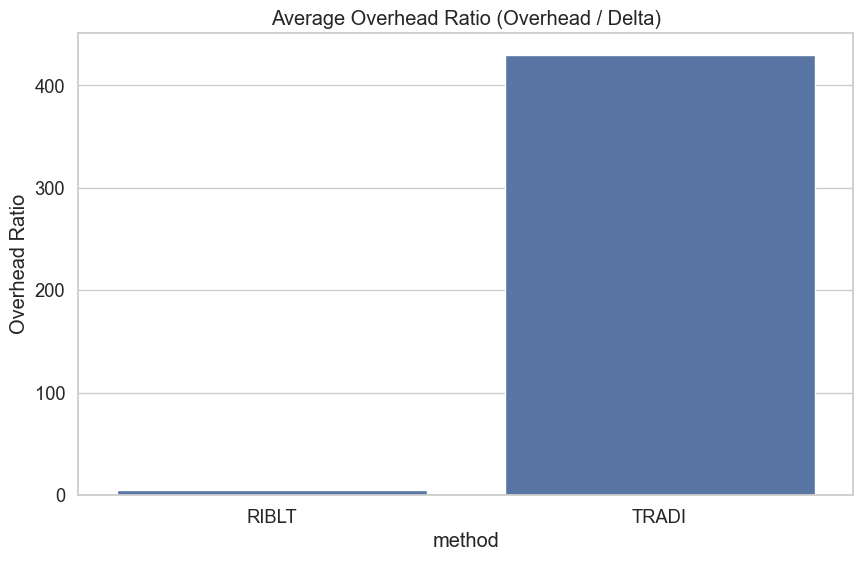

In [72]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x="method",
    y="overhead_ratio",
    errorbar=None
)
plt.title("Average Overhead Ratio (Overhead / Delta)")
plt.ylabel("Overhead Ratio")
plt.show()

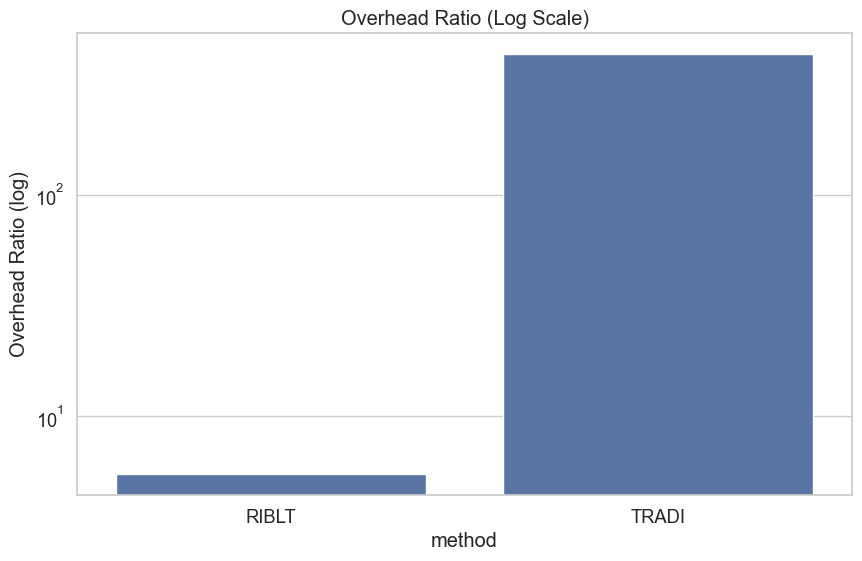

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x="method",
    y="overhead_ratio",
    errorbar=None
)
plt.yscale("log")
plt.title("Overhead Ratio (Log Scale)")
plt.ylabel("Overhead Ratio (log)")
plt.show()

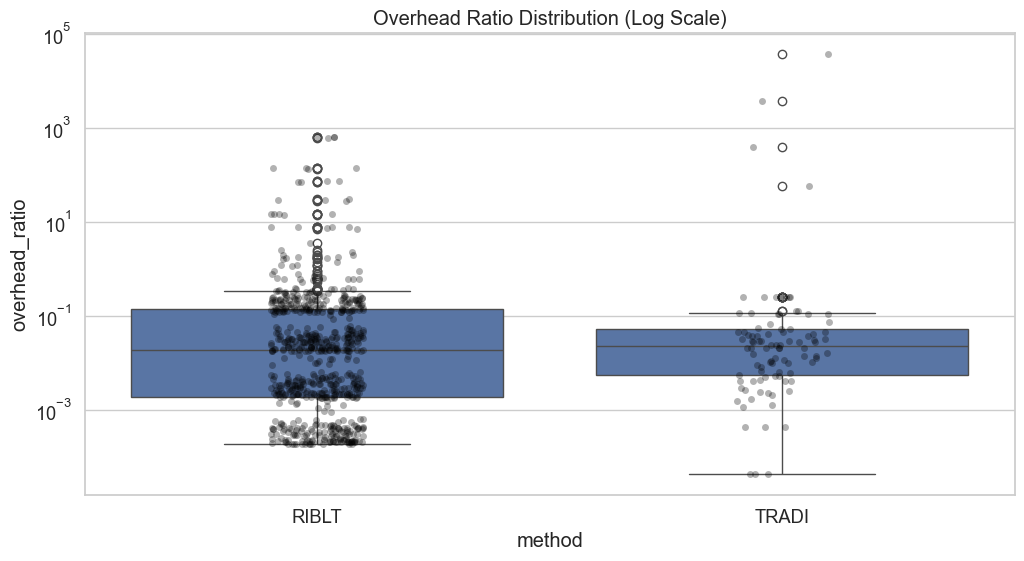

In [74]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="method", y="overhead_ratio")
sns.stripplot(data=df, x="method", y="overhead_ratio", color="black", alpha=0.3)
plt.yscale("log")
plt.title("Overhead Ratio Distribution (Log Scale)")
plt.show()

In [75]:
df.groupby("method")["overhead_ratio"].mean()

method
RIBLT      5.489293
TRADI    429.513643
Name: overhead_ratio, dtype: float64

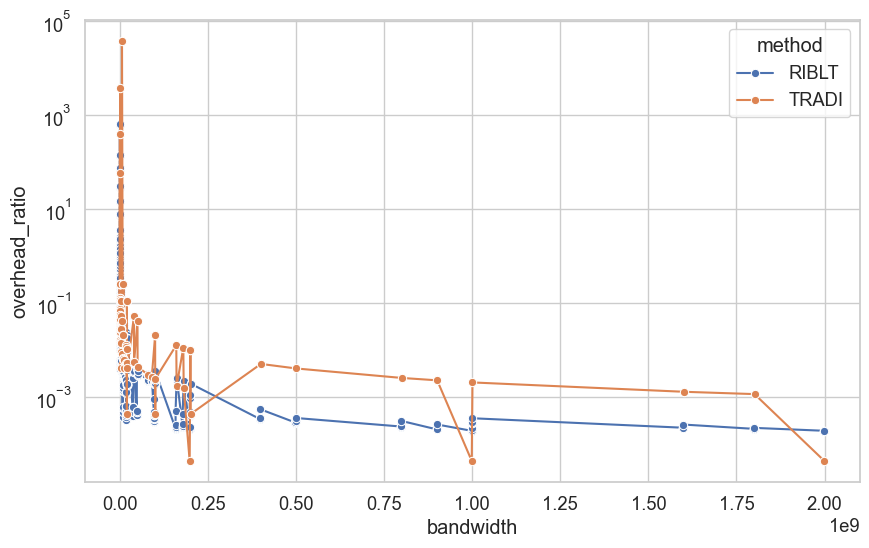

In [77]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df,
    x="bandwidth",
    y="overhead_ratio",
    hue="method",
    marker="o"
)
plt.yscale("log")
plt.show()

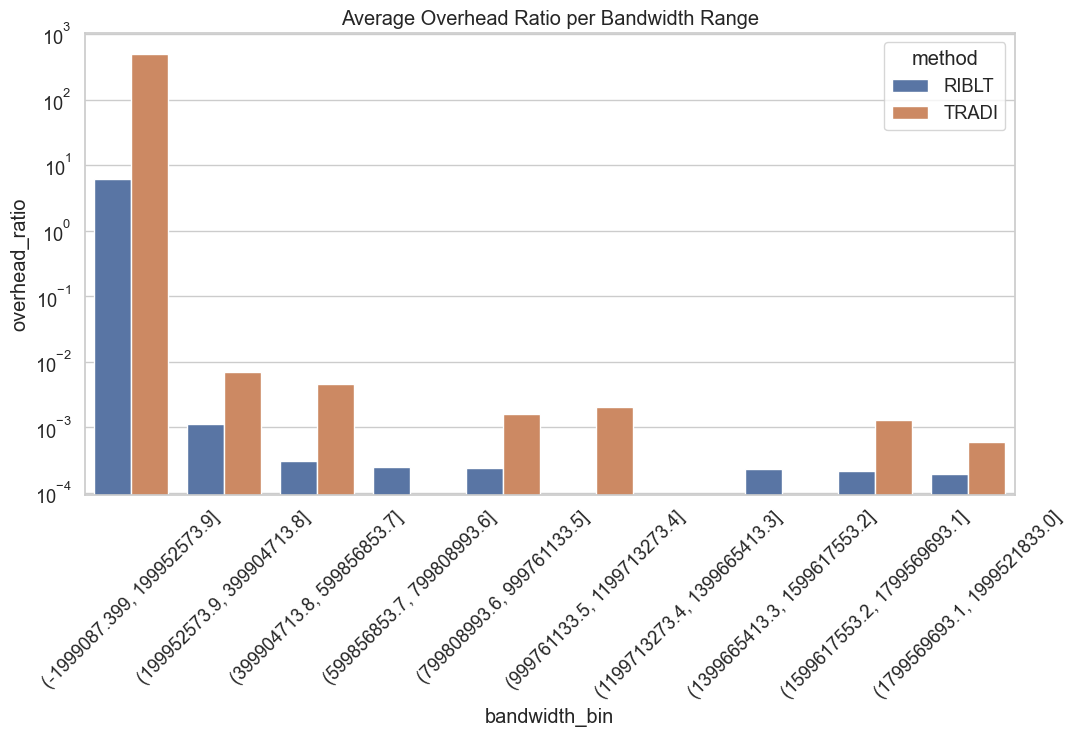

In [78]:
df["bandwidth_bin"] = pd.cut(df["bandwidth"], bins=10)

plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x="bandwidth_bin",
    y="overhead_ratio",
    hue="method",
    errorbar=None
)
plt.xticks(rotation=45)
plt.yscale("log")
plt.title("Average Overhead Ratio per Bandwidth Range")
plt.show()

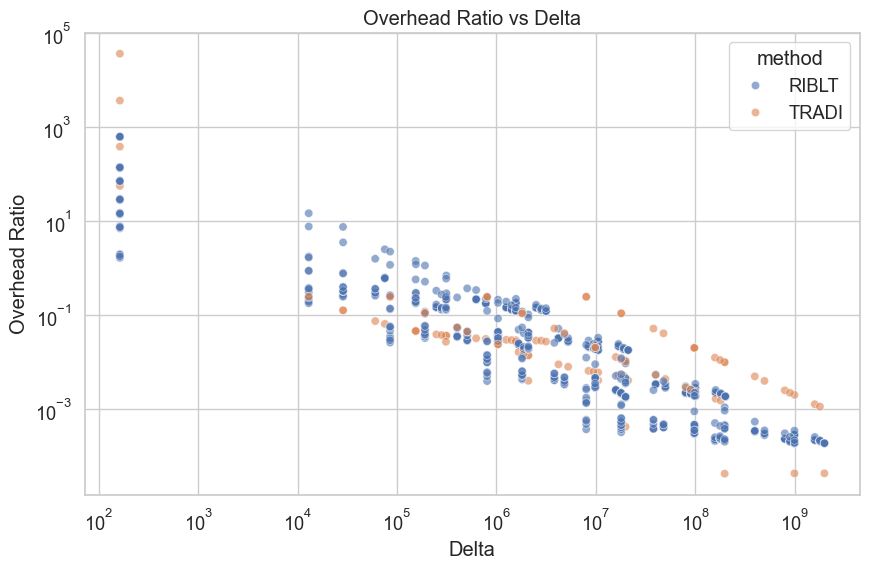

In [79]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="delta",
    y="overhead_ratio",
    hue="method",
    alpha=0.6
)
plt.xscale("log")   # IMPORTANT
plt.yscale("log")   # VERY IMPORTANT
plt.title("Overhead Ratio vs Delta")
plt.xlabel("Delta")
plt.ylabel("Overhead Ratio")
plt.show()


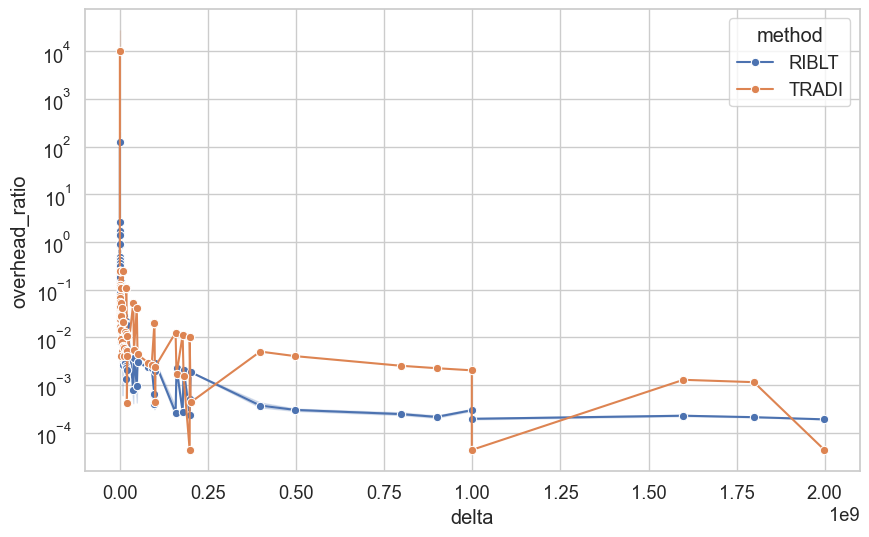

In [80]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df,
    x="delta",
    y="overhead_ratio",
    hue="method",
    marker="o"
)
plt.yscale("log")
plt.show()